# FEATURE ENGINEERING - PROJECT1

## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

%matplotlib inline

(A)	COLLECT / EXTRACT DATA
THE FIRST STEP IN BUILDING A MODEL IS TO COLLECT OR EXTRACT DATA ON THE DEPENDENT VARIABLE AND INDEPENDENT VARIABLES FROM DIFFERENT DATASETS PROVIDED. DATA COLLECTION / EXTRACTION IS TIME CONSUMING AND EXPENSIVE PROCESS.

1.	YOU AS TEAM OF THREE OR FOUR STUDENTS YOU HAVE MERGE THE CANDIDATE DATA PROVIDED BASED ON THE COMMON FACTORS. 
2.	SIMULTANESUOYLY YOU NEED TO MAKE SEARCH WHAT ARE THE ATTRIBUTES THOSE ARE TAKEN INTO CONSIDERATION WHILE CARRYING OUT RECRUITMENT ACTIVITY. 
3.	THE RESEARCH WILL PROVIDE YOU MORE INSIGHT ON DETERMINING THE USEFUL ATTRIBUTES PRESENT IN THE DATASET OR GIVE POINTERS TO THE VARIBLES THAT NEEDS TO BE DERVIED. MAKE LIST OF SUCH POTENTIAL ATTRIBTUES. 
4.	OUTCOME OF THIS STEP WILL BE MERGED DATA SET CONTAINING THE 200 CANDIDATES DATA. 
5.	DOCUMENT ALL YOUR EFFORTS APPROPRIATELY IN THE JUPYTER NOTEBOOKS WITH DESCRIPTION AND CODE. 

## Read Data to a Pandas DataFrame

##### Load Application Data

In [3]:
application_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Application data')

In [4]:
application_data_df.head()

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,LOB,Joining location,Candidate relocation status,Acceptance status
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,IT,NCR,Yes,Joined
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,Manufacturing,NCR,Yes,Offer Rejected
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,IT,Chennai,No,Joined
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,Finance,Hyderabad,No,Offer Rejected
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,IT,Mumbai,Yes,Joined


##### Load Candidate Data

In [5]:
candidate_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Candidate Data')

In [6]:
candidate_data_df.head()

,Candidate ID,Notice period,Current CTC,Current gross salary,Current organization,Highest Educational Degree,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs
0,C1,0,1162445.625,1033285,IBM,Diploma,8,7.2,2012,1500000,0.290383,M,Direct,1991-11-06,Kolkata,2
1,C2,0,2234102.625,1985869,Mahindra,Diploma,15,13.5,2005,3200000,0.432342,M,Agency,1984-02-22,Pune,4
2,C3,30,583368.750,518550,Infosys,Diploma,4,3.6,2016,800000,0.371345,M,Direct,1995-03-27,Chennai,1
3,C4,60,3202764.750,2846902,JP Morgun,Diploma,20,18.0,2000,4400000,0.373813,M,Direct,1979-06-14,Hyderabad,6
4,C5,15,2590637.625,2302789,HCL,Diploma,17,15.3,2003,3600000,0.389619,M,Employee referral,1982-11-26,Hyderabad,5


##### Load Interview Data

In [7]:
interview_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Interview Data ')

In [8]:
interview_data_df.head()

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration
0,C1,2020-05-29,4,2020-06-03,2020-06-12,General,Online,40,25
1,C2,2020-05-31,2,2020-06-05,2020-06-08,Managerial,FaceToFace,40,40
2,C3,2020-05-15,3,2020-05-20,2020-05-26,Technical,Online,45,60
3,C4,2020-05-10,1,2020-05-15,2020-05-15,Technical,Written,40,40
4,C5,2020-01-11,4,2020-01-16,2020-01-25,Technical,Online,15,25


##### Merge Application, Candidate and Interview Data by Candidate ID

In [9]:
master_data = application_data_df.merge(candidate_data_df, on='Candidate ID').merge(interview_data_df, on='Candidate ID')


In [10]:
master_data.head().T

,0,1,2,3,4
Candidate ID,C1,C2,C3,C4,C5
Date of Application,2019-08-28 00:00:00,2019-11-28 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-09-06 00:00:00
Date of Interview,2020-06-12 00:00:00,2020-06-08 00:00:00,2020-05-26 00:00:00,2020-05-15 00:00:00,2020-01-25 00:00:00
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00
Offered band,B2,B4,B0,C6,B5
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619
Joining bonus amount,58122.3,111705,29168.4,160138,129532


## Get dimensionality of the data

In [11]:
print("Number of Records : {} \nNumber of variables : {}".format(master_data.shape[0],master_data.shape[1]))

Number of Records : 200 
Number of variables : 37


## Observe the data

In [12]:
master_data.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Candidate ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
Date of Application,2019-08-28 00:00:00,2019-11-28 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-09-06 00:00:00,2019-10-08 00:00:00,2019-07-31 00:00:00,2019-09-13 00:00:00,2019-12-24 00:00:00,2019-10-03 00:00:00,...,2019-10-21 00:00:00,2019-11-16 00:00:00,2019-12-16 00:00:00,2019-09-05 00:00:00,2019-08-21 00:00:00,2019-12-06 00:00:00,2019-11-10 00:00:00,2019-11-19 00:00:00,2019-09-12 00:00:00,2019-10-29 00:00:00
Date of Interview,2020-06-12 00:00:00,2020-06-08 00:00:00,2020-05-26 00:00:00,2020-05-15 00:00:00,2020-01-25 00:00:00,2020-02-27 00:00:00,2020-04-29 00:00:00,2020-03-31 00:00:00,2020-06-26 00:00:00,2020-04-04 00:00:00,...,2020-01-09 00:00:00,2020-02-26 00:00:00,2020-06-28 00:00:00,2020-01-23 00:00:00,2020-03-06 00:00:00,2020-06-08 00:00:00,2020-06-24 00:00:00,2020-01-31 00:00:00,2020-05-02 00:00:00,2020-01-29 00:00:00
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00,2020-03-08 00:00:00,2020-05-09 00:00:00,2020-04-10 00:00:00,2020-07-06 00:00:00,2020-04-14 00:00:00,...,2020-01-19 00:00:00,2020-03-07 00:00:00,2020-07-08 00:00:00,2020-02-02 00:00:00,2020-03-16 00:00:00,2020-06-18 00:00:00,2020-07-04 00:00:00,2020-02-10 00:00:00,2020-05-12 00:00:00,2020-02-08 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00,2020-03-15 00:00:00,2020-05-16 00:00:00,2020-04-17 00:00:00,2020-07-13 00:00:00,2020-04-21 00:00:00,...,2020-01-26 00:00:00,2020-03-14 00:00:00,2020-07-15 00:00:00,2020-02-09 00:00:00,2020-03-23 00:00:00,2020-06-25 00:00:00,2020-07-11 00:00:00,2020-02-17 00:00:00,2020-05-19 00:00:00,2020-02-15 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00,2020-04-14 00:00:00,2020-06-30 00:00:00,2020-06-16 00:00:00,2020-08-12 00:00:00,2020-05-06 00:00:00,...,2020-03-11 00:00:00,2020-05-13 00:00:00,2020-08-29 00:00:00,2020-02-24 00:00:00,2020-04-22 00:00:00,2020-08-09 00:00:00,2020-08-25 00:00:00,2020-03-03 00:00:00,2020-07-18 00:00:00,2020-04-15 00:00:00
Offered band,B2,B4,B0,C6,B5,C6,B3,B0,B5,B4,...,B5,B3,B4,C6,B1,B5,B5,B4,B4,B0
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06,4.37329e+06,2.70625e+06,556952,2.66841e+06,2.68362e+06,...,2.96745e+06,2.70565e+06,2.67381e+06,3.8102e+06,1.0192e+06,3.63256e+06,2.95136e+06,2.39268e+06,2.80392e+06,740156
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619,0.338593,0.39679,0.293796,0.152236,0.240235,...,0.276019,0.392128,0.182117,0.31476,0.261343,0.358273,0.186976,0.154088,0.43002,0.236813
Joining bonus amount,58122.3,111705,29168.4,160138,129532,163354,96874,21524,115793,108190,...,116277,97176.7,113094,144901,40401.3,133720,124322,103661,98038,29921.9


In [13]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Candidate ID                     200 non-null    object        
 1   Date of Application              200 non-null    datetime64[ns]
 2   Date of Interview                200 non-null    datetime64[ns]
 3   Date of Job Offer                200 non-null    datetime64[ns]
 4   Date of Offer extension          200 non-null    datetime64[ns]
 5   Date of Joining                  200 non-null    datetime64[ns]
 6   Offered band                     200 non-null    object        
 7   Offered Salary                   200 non-null    float64       
 8   Percentage hike offered (CTC)    200 non-null    float64       
 9   Joining bonus amount             200 non-null    float64       
 10  LOB                              200 non-null    object       

In [14]:
master_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Offered Salary,200.0,2.346565e+06,1.095181e+06,460949.11250,1.396196e+06,2.414243e+06,3.317921e+06,4.568679e+06
Percentage hike offered (CTC),200.0,2.706716e-01,8.713134e-02,0.10994,1.940578e-01,2.755148e-01,3.400898e-01,4.917724e-01
Joining bonus amount,200.0,9.296728e+04,4.371861e+04,18048.88125,5.295534e+04,9.694949e+04,1.333756e+05,1.676222e+05
Notice period,200.0,3.127500e+01,2.203810e+01,0.00000,1.500000e+01,3.000000e+01,4.500000e+01,6.000000e+01
Current CTC,200.0,1.859346e+06,8.743721e+05,360977.62500,1.059107e+06,1.938990e+06,2.667512e+06,3.352445e+06
Current gross salary,200.0,1.652752e+06,7.772197e+05,320869.00000,9.414282e+05,1.723546e+06,2.371122e+06,2.979951e+06
Total experience,200.0,1.228000e+01,5.242041e+00,3.00000,7.750000e+00,1.200000e+01,1.700000e+01,2.000000e+01
Relevant experience,200.0,1.105200e+01,4.717837e+00,2.70000,6.975000e+00,1.080000e+01,1.530000e+01,1.800000e+01
Year of graduation,200.0,2.007720e+03,5.242041e+00,2000.00000,2.003000e+03,2.008000e+03,2.012250e+03,2.017000e+03
Expected CTC,200.0,2.532500e+06,1.181556e+06,500000.00000,1.500000e+06,2.600000e+06,3.600000e+06,4.900000e+06


In [15]:
master_data.describe(include=["object"]).T 

,count,unique,top,freq
Candidate ID,200,200,C96,1
Offered band,200,7,C6,42
LOB,200,3,IT,120
Joining location,200,5,NCR,51
Candidate relocation status,200,2,Yes,185
Acceptance status,200,2,Joined,102
Current organization,200,15,Oracle,21
Highest Educational Degree,200,3,Bachelors,73
Gender,200,2,M,111
Candidate source,200,3,Employee referral,72


### Check for null values in the data sets

In [16]:
master_data.isnull().sum()

Candidate ID                       0
Date of Application                0
Date of Interview                  0
Date of Job Offer                  0
Date of Offer extension            0
Date of Joining                    0
Offered band                       0
Offered Salary                     0
Percentage hike offered (CTC)      0
Joining bonus amount               0
LOB                                0
Joining location                   0
Candidate relocation status        0
Acceptance status                  0
Notice period                      0
Current CTC                        0
Current gross salary               0
Current organization               0
Highest Educational Degree         0
Total experience                   0
Relevant experience                0
Year of graduation                 0
Expected CTC                       0
Percentage hike (CTC) expected     0
Gender                             0
Candidate source                   0
DOB                                0
L

### Check for duplicates

In [17]:
#identifying and removing duplicate values
duplicate_rows_df = master_data[master_data.duplicated()]
print( duplicate_rows_df.shape)
print( "No duplicate data")

(0, 37)
No duplicate data


### Data type conversion

In [18]:
#conved objects to string

master_data[['Offered band', 'LOB', 'Joining location','Candidate relocation status','Acceptance status','Current organization','Highest Educational Degree','Gender','Candidate source','Location','Interview types','Interview Types2']] = master_data[['Offered band', 'LOB', 'Joining location','Candidate relocation status','Acceptance status','Current organization','Highest Educational Degree','Gender','Candidate source','Location','Interview types','Interview Types2']].astype("string")

In [19]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Candidate ID                     200 non-null    object        
 1   Date of Application              200 non-null    datetime64[ns]
 2   Date of Interview                200 non-null    datetime64[ns]
 3   Date of Job Offer                200 non-null    datetime64[ns]
 4   Date of Offer extension          200 non-null    datetime64[ns]
 5   Date of Joining                  200 non-null    datetime64[ns]
 6   Offered band                     200 non-null    string        
 7   Offered Salary                   200 non-null    float64       
 8   Percentage hike offered (CTC)    200 non-null    float64       
 9   Joining bonus amount             200 non-null    float64       
 10  LOB                              200 non-null    string       

In [22]:
#create a target coulmn as numeric
master_data['Target'] =master_data['Acceptance status'].astype('category').cat.codes

In [23]:
master_data.head().T

,0,1,2,3,4
Candidate ID,C1,C2,C3,C4,C5
Date of Application,2019-08-28 00:00:00,2019-11-28 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-09-06 00:00:00
Date of Interview,2020-06-12 00:00:00,2020-06-08 00:00:00,2020-05-26 00:00:00,2020-05-15 00:00:00,2020-01-25 00:00:00
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00
Offered band,B2,B4,B0,C6,B5
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619
Joining bonus amount,58122.3,111705,29168.4,160138,129532


In [41]:
master_data.corr().abs()

,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs,Interview rounds,First interview duration,Last interaction duration,Target
Offered Salary,1.000000,0.066571,0.986880,0.001660,0.986880,0.986880,0.983989,0.983989,0.983989,0.999929,0.066571,0.970064,0.052529,0.204745,0.065759,0.012688
Percentage hike offered (CTC),0.066571,1.000000,0.211758,0.086445,0.211758,0.211758,0.207119,0.207119,0.207119,0.077375,1.000000,0.198848,0.103596,0.146726,0.138607,0.040930
Joining bonus amount,0.986880,0.211758,1.000000,0.014822,1.000000,1.000000,0.995662,0.995662,0.995662,0.988738,0.211758,0.981582,0.064913,0.177973,0.047623,0.014814
Notice period,0.001660,0.086445,0.014822,1.000000,0.014822,0.014822,0.011901,0.011901,0.011901,0.000441,0.086445,0.018249,0.070658,0.011426,0.032927,0.052347
Current CTC,0.986880,0.211758,1.000000,0.014822,1.000000,1.000000,0.995662,0.995662,0.995662,0.988738,0.211758,0.981582,0.064913,0.177973,0.047623,0.014814
Current gross salary,0.986880,0.211758,1.000000,0.014822,1.000000,1.000000,0.995662,0.995662,0.995662,0.988738,0.211758,0.981582,0.064913,0.177973,0.047623,0.014814
Total experience,0.983989,0.207119,0.995662,0.011901,0.995662,0.995662,1.000000,1.000000,1.000000,0.985738,0.207119,0.981261,0.060624,0.176054,0.055323,0.027851
Relevant experience,0.983989,0.207119,0.995662,0.011901,0.995662,0.995662,1.000000,1.000000,1.000000,0.985738,0.207119,0.981261,0.060624,0.176054,0.055323,0.027851
Year of graduation,0.983989,0.207119,0.995662,0.011901,0.995662,0.995662,1.000000,1.000000,1.000000,0.985738,0.207119,0.981261,0.060624,0.176054,0.055323,0.027851
Expected CTC,0.999929,0.077375,0.988738,0.000441,0.988738,0.988738,0.985738,0.985738,0.985738,1.000000,0.077375,0.971789,0.053492,0.202948,0.064476,0.012857


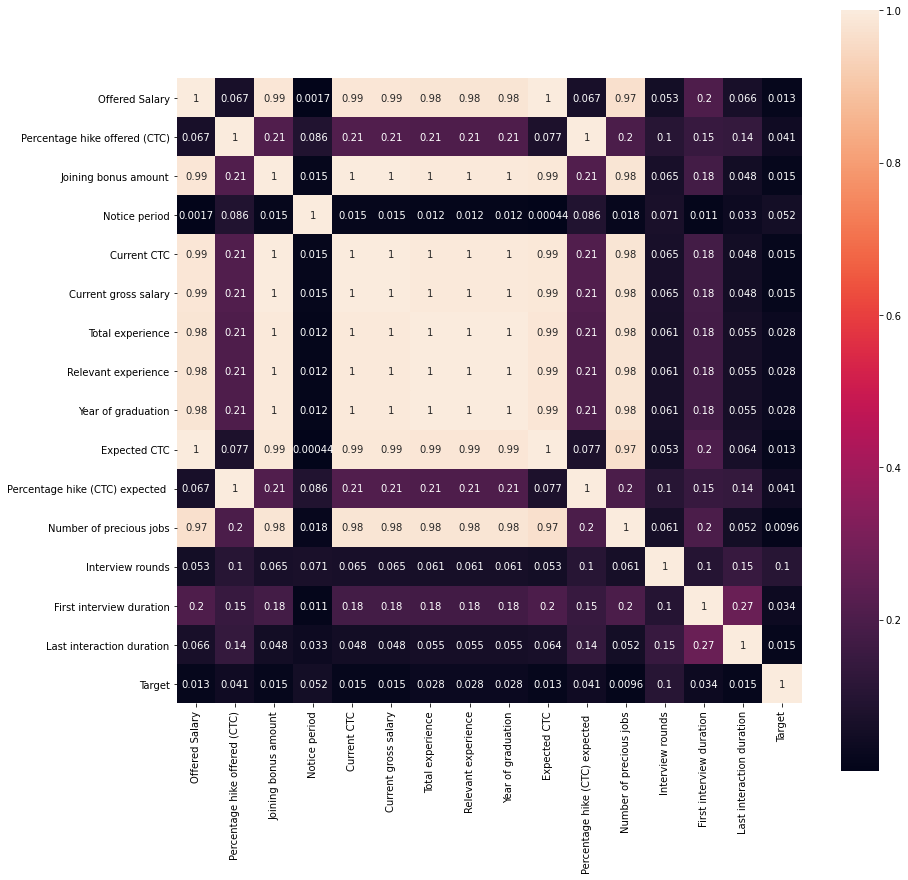

In [25]:
#heat map - normalize and recheck
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(master_data.corr().abs(), annot=True, fmt='.2g', square=True, ax=ax)
plt.show()

### chi-square Test

In [ ]:
def compute_chi_square(column_1, column_2):
    ct1 = pd.crosstab(master_data[column_1], master_data[column_2], dropna=False)
    stat, p, dof, expected = chi2_contingency(ct1) 
  
    # interpret p-value 
    alpha = 0.05
    print("p value is " + str(p)) 
    if p <= alpha: 
        print('Dependent (reject H0)') 
        return p
    else: 
        print('Independent (H0 holds true)')
        return p, True

In [ ]:
p = compute_chi_square('Highest Educational Degree','Acceptance status')
print(p)